In [439]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [440]:
import os
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal

In [441]:
dir = '/Users/innocent/cernbox/HepSpec/fragData/'
#file = dir+'perfMonAMD1.log'
#amd = True
file = dir+'perfMonMultiB.log'
amd = False

In [442]:
columns = ['time','rawValue','unit','name','count','frac','metricValue','metric']
perfRaw =  pd.read_csv(file, delimiter=",",names=columns)
perfRaw['metric'] = perfRaw['metric'] +'_' + perfRaw['name']

In [443]:
clus=perfRaw
print(clus.index)
print(clus.columns)
print(clus.size)
print(clus.describe())
print(clus.head(25))
print(clus.tail())

RangeIndex(start=0, stop=3154, step=1)
Index(['time', 'rawValue', 'unit', 'name', 'count', 'frac', 'metricValue',
       'metric'],
      dtype='object')
25232
              time      rawValue         count         frac  metricValue
count  3154.000000  3.154000e+03  3.154000e+03  3154.000000  3154.000000
mean    835.677258  1.572086e+11  2.405483e+11    60.087939   174.462465
std     479.610975  2.955051e+11  1.227469e+11    30.662764   305.011849
min      10.022439  0.000000e+00  1.333529e+11    33.320000     0.000000
25%     420.369960  1.995620e+05  1.334536e+11    33.330000     0.150000
50%     835.772407  2.806485e+08  1.668029e+11    41.670000     1.845000
75%    1250.975170  2.020797e+11  4.003097e+11   100.000000   225.709750
max    1661.174731  1.171148e+12  4.007462e+11   100.000000  2362.370000
         time      rawValue  unit                                        name  \
0   10.022439  4.007462e+05  msec                                  task-clock   
1   10.022439  3.1455

In [444]:
raw = perfRaw.pivot(index='time', columns='name', values='rawValue')
#raw = raw[raw['cycles']>250000000000.]

In [445]:
metrics = perfRaw.pivot(index='time', columns='metric', values='metricValue')
metrics = metrics[metrics['GHz_cycles']>0.59]

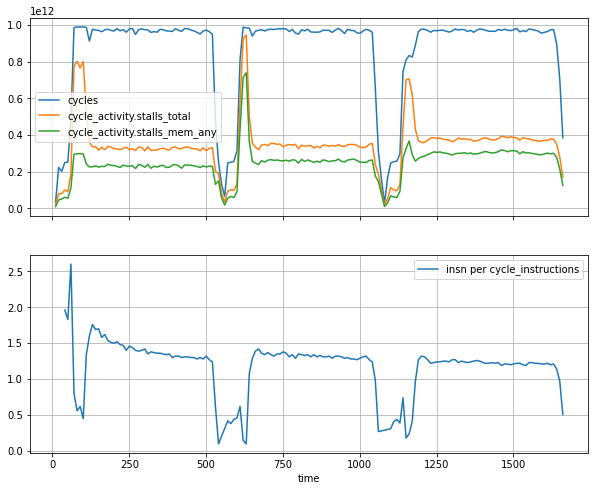

In [446]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(10, 8))
raw['cycles'].plot(ax=ax1)
if amd :
 raw['stalled-cycles-backend'].plot(ax=ax1)
 raw['stalled-cycles-frontend'].plot(ax=ax1)
else :
 raw['cycle_activity.stalls_total'].plot(ax=ax1)
 raw['cycle_activity.stalls_mem_any'].plot(ax=ax1)
ax1.legend()
ax1.grid()
metrics['insn per cycle_instructions'].plot(ax=ax2)
ax2.legend()
ax2.grid()
plt.show()

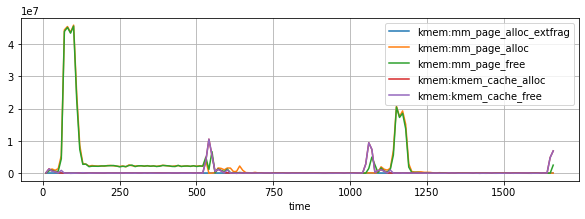

In [447]:
fig, axs = plt.subplots(figsize=(10, 3))
raw['kmem:mm_page_alloc_extfrag'].plot()
raw['kmem:mm_page_alloc'].plot()
raw['kmem:mm_page_free'].plot()
raw['kmem:kmem_cache_alloc'].plot()
raw['kmem:kmem_cache_free'].plot()
axs.legend()
plt.grid()
plt.show()

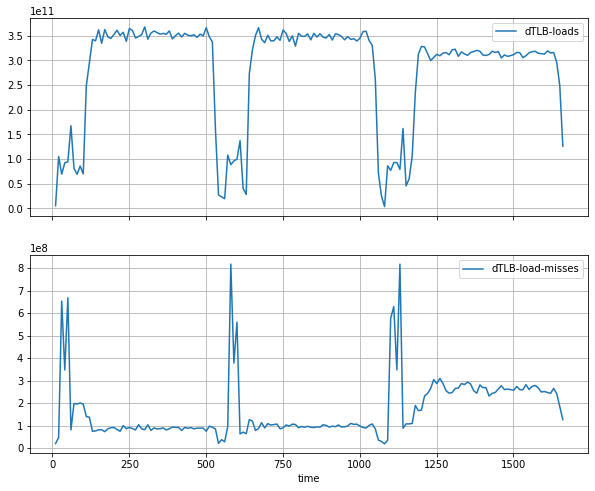

In [448]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(10, 8))
raw['dTLB-loads'].plot(ax=ax1)
raw['dTLB-load-misses'].plot(ax=ax2)
ax1.legend()
ax2.legend()
# plt.yscale("log")
ax1.grid()
ax2.grid()
plt.show()

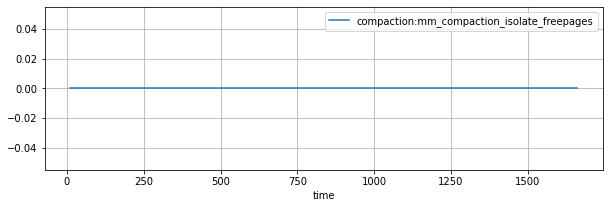

In [449]:
if amd: 
    fig, axs = plt.subplots(figsize=(10, 3))
    raw['compaction:mm_compaction_try_to_compact_pages'].plot()
    raw['huge_memory:mm_collapse_huge_page'].plot()
    axs.legend()
    #plt.yscale("log")
    plt.grid()
    plt.show()
fig, axs = plt.subplots(figsize=(10, 3))
raw['compaction:mm_compaction_isolate_freepages'].plot()
axs.legend()
#plt.yscale("log")
plt.grid()
plt.show()
